# Exploratory Data Analysis (MS Big Data and IA) 

For any questions on the course or this notebook: charlotte.laclau@telecom-paris.fr

The purpose of this practical is to make you go through the different eda techniques presented during the course. 
We will work with this lab for several sessions. 

The dataset that we will consider consists of food recipes and recipe reviews covering 18 years of user interactions and uploads on Food.com (formerly GeniusKitchen). It is often used to evaluate machine learning models that perform recipe recommendations. We will mainly study two files : recipe.csv and inter.csv. 

## Organisation of the sessions 


This lab is splitted into several parts. The begining is well guided and has your skills improve, you'll have to be more independent. Mandatory questions are in <span style="color:blue">blue</span> in the subsequent notebook. 
At the end of each part you have a small bonus section. I strongly encourage you to do them (not only for the grade but mostly to improve your python coding skills). 


## Evaluation 

At the end of the course, this lab with be graded. Here are some guidelines about what I expect from you. 
- At the end of our last course, you will upload your notebook along with a `requirement.txt` file on ecampus 
- Your code needs to be carefully commented 
- You have to write a few sentence commenting all the results that you obtained ! I suggest to group results and write intermediate conclusions answering the different questions. 
- I don't want to see any personalized functions or classes in the main notebook. Think modular code! If you want to write specific functions write them in some `utils.py` file. The main notebook code should be as light as possible. 

# Package

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

## Part 1 - Univariate Analysis

Let us start with the recipe file that contains the reciped submitted to the website describes by several features. 
Below you'll find some code to read the data and print the first three rows. I used the `panda` library for these two steps, meaning that I will be manipulating a dataframe object. 

**Questions** 
- <span style="color:blue">How many recipes are in the file ? </span>
- <span style="color:blue">How many variables do you have. Write the list in a md cell along with the type of the variable for each.</span>
- <span style="color:blue">Are there any missing values in your dataset?</span>

In [2]:
df = pd.read_csv("RAW_recipes.csv")

In [3]:
shape_recipe = np.shape(df)
raw_recipe = shape_recipe[0]
number_of_variable = shape_recipe[1]
print("number of recipe : ", raw_recipe, ", number of variable :", number_of_variable)

number of recipe :  231637 , number of variable : 12


In [4]:
number_of_missing_values = pd.isnull(df).sum().sum()
percentage_of_missing_values = (number_of_missing_values / raw_recipe) * 100
print("percentage_of_missing_values : ", percentage_of_missing_values)

percentage_of_missing_values :  2.149915600702824


Let's delete the missing values because we are here to practise the data analysis. At the end, we will use this part of missing data to make prediction. 

In [5]:
# Drop the element at least one element is NaN
df = df.dropna()

In [6]:
number_of_missing_values = pd.isnull(df).sum().sum()
print(number_of_missing_values)

0


In [7]:
print(df.columns)

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')


In [8]:
df.dtypes

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

In [9]:
df["nutrition"].head()

0         [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]
1     [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]
2    [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]
3     [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]
4     [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]
Name: nutrition, dtype: object

List of variables:
- name : nominale qualitative
- id : nominale qualitative
- minutes : continious
- contributor_id : nominale qualitative
- submitted : nominale qualitative
- tags : nominale qualitative
- nutrition : continious
- n_steps : discrete
- steps : nominale qualitative
- description : nominale qualitative
- ingredients : nominale qualitative
- n_ingredients : discret

### A example of univariate analysis with *minutes*

Let's start by analysing the feature **minutes**. It corresponds to the number of minutes required to make a given recipe. Here a few questions to answer to 
- What is the average time required to make a recipe on the website ? 
- What are the fastest and the longest recipe, and how long do they take ? 

For both questions we will use some statistics including the mean, the minimum and the maximum. 

Odd ? What do you think ? 
Let's convert the maximum into hours and minutes to make it easier to understand. 

Seems a lot ! I prefer to order in that case. Let's see what can cause this very high number by trying to answer the second question.

So the longest cooking recipe roughly takes around 4085 years to be made ... while the minumum is 0. Seems like we have some outliers. 

Questions
- <span style="color:blue"> Print the row(s) of the dataframe corresponding to the maximum value for minutes </span>
- <span style="color:blue"> Print the number of row(s) of the dataframe corresponding to the minimum value for minutes </span>
- <span style="color:blue"> Choose an appropriate visualisation to highlight these outliers</span>

In [10]:
# Your code
minutes_maximum = df["minutes"].max()
minutes_maximum_row = df[df["minutes"] == minutes_maximum]
print(minutes_maximum_row)

                         name      id     minutes  contributor_id   submitted  \
144074  no bake granola balls  261647  2147483647          464080  2007-10-26   

                                                     tags  \
144074  ['60-minutes-or-less', 'time-to-make', 'course...   

                                          nutrition  n_steps  \
144074  [330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]        9   

                                                    steps  \
144074  ['preheat the oven to 350 degrees', 'spread oa...   

                                              description  \
144074  healthy snacks that kids (and grown ups) will ...   

                                              ingredients  n_ingredients  
144074  ['rolled oats', 'unsweetened dried shredded co...              8  


In [11]:
# Your code
minutes_minimum = df["minutes"].min()
minutes_minimum_row = df[df["minutes"] == minutes_minimum]
print(len(minutes_minimum_row))

429


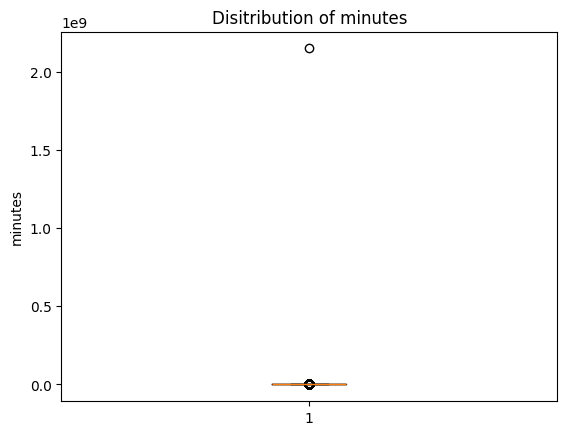

In [12]:
# Distribution of minutes
fig = plt.figure()
ax = fig.add_subplot()
plt.title("Disitribution of minutes")
plt.ylabel("minutes")
ax.boxplot(df["minutes"])
plt.show()

We can't see the graphic due to the maximal value. So, let's delete it.

We see that there are many outliers minutes. Let's make a condition to delete them (03 days)

### Matplotlib

#### Online Documentation

The [matplotlib.org](https://matplotlib.org/) project website is the primary online resource for the library's documentation. It contains the example galleries, FAQs, API documentation, and tutorials.
You can take a look at the [Gallery](https://matplotlib.org/stable/gallery/index.html) to see the variety of ways one can make figures.

#### Basics of Matplotlib

Let's start by taking a closer look at the anatomy of a Matplolib plot by answering to the following questions. 

1. **What exactly is a Figure?** 

The top level container for all the plot elements. It is the overall window or page that everything is drawn on. The Figure object is instantiated by calling the `figure()` function from the pyplot module. You can create multiple independent Figures. A Figure can have several other things in it, such as a title, which is a centered title to the figure. You’ll also find that you can add a legend and color bar, for example, to your Figure.

2. **What are the Axes?** 

To the figure you add Axes. Axes object is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D visualisation) Axis objects (x and y). Axes can have ticks, labels, etc. associated with it.


**Note** We have previously imported the `pyplot` module of the `matplotlib` library under the alias `plt`.
Pyplot provides the state-machine interface to the underlying plotting library in matplotlib. This means that figures and axes are implicitly and automatically created to achieve the desired plot. For example, calling `plot` from `pyplot` will automatically create the necessary figure and axes to achieve the desired plot.

<img src="img/anatomy_01.png" alt="anatomy of a figure" />

Now that we have identified an abnormal values, what can we do with it? 

*Easy answer*: remove it ! (let's do this for now)

*Fancy answer*: consider this as a missing data input and impute it (keep that for later).

**Question**
- <span style="color:blue">Remove the recipe containing these abnormal values and check the new size of the data</span>
- <span style="color:blue">Plot the variable minutes with a boxplot -- this time you can try seaborn!</span>
- <span style="color:blue">Check the new maximum and minimum</span>
- <span style="color:blue">Print the 5 first observations for which abnormal values are observed. Comment</span>
- <span style="color:blue">Propose a strategy to deal with these observations.</span>
- <span style="color:blue">In total how many observations have you removed?</span>

<Axes: ylabel='minutes'>

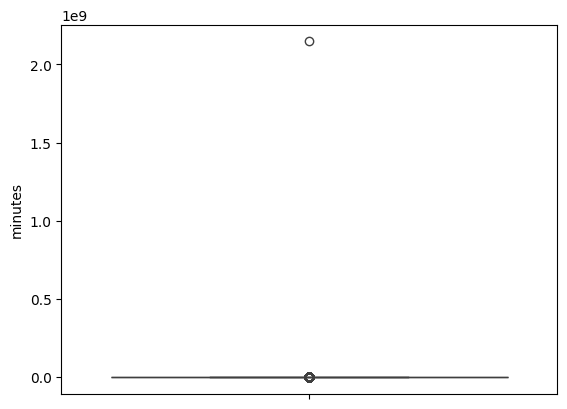

In [13]:
# Your code
ax = sns.boxplot(df["minutes"])
ax

In [14]:
# Your code
df_without_missing_values = df[df["minutes"] < minutes_maximum]

<Axes: ylabel='minutes'>

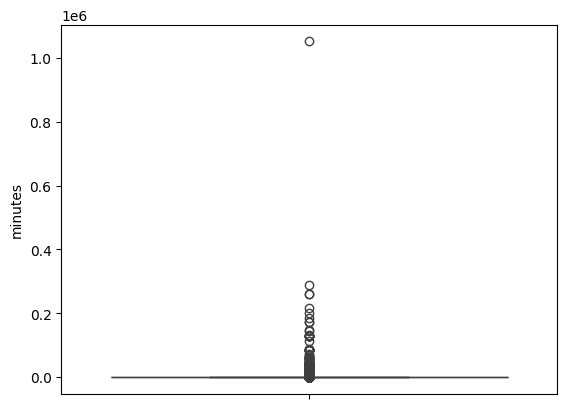

In [15]:
# Your code
ax = sns.boxplot(df_without_missing_values["minutes"])
ax

In [16]:
threes_days_on_minutes = 3 * 24 * 60
threes_days_on_minutes
df_without_missing_values = df[df["minutes"] < threes_days_on_minutes]

In [17]:
new_maximum_minutes = df_without_missing_values["minutes"].max()
new_maximum_minutes

np.int64(4215)

In [18]:
minutes_top_5 = df_without_missing_values["minutes"].nlargest()
print("5 first observations for which abnormal values are observed : ", minutes_top_5)

5 first observations for which abnormal values are observed :  147777    4215
23145     4010
104179    3915
222818    3900
21681     3660
Name: minutes, dtype: int64


Now, we have accepted values even if we can delete them.

In [19]:
df_without_missing_values.shape

(226188, 12)

In [20]:
print("In total, we will delete : ", df.shape[0] - df_without_missing_values.shape[0], "observations" )

In total, we will delete :  469 observations


<Axes: ylabel='minutes'>

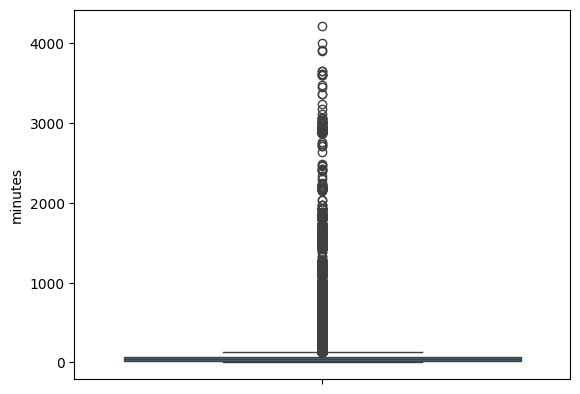

In [21]:
sns.boxplot(df_without_missing_values["minutes"])

So in this particular case, boxplot suffers from the very high standard deviation observed for the feature minutes. 
Can we come up with a better visualisation ? 

- **Option 1**: use a log-scale on the y axis the feature
- **Option 2**: remove a lot of values

**Questions**: 
- <span style="color:blue"> Print the values of the different quartile (Q1, median and Q3). What can you conclude for this variable ? </span>
- <span style="color:blue"> Compare the mean with the median. What do you observe?</span>
- <span style="color:blue">Create a subplot with on the left the original boxplot, and on the right the same boxplot but with a log scale on the y-axis.</span> 

#### Subplots

The matplotlib.pyplot.subplots method provides a way to plot multiple plots on a single figure. Given the number of rows and columns, it returns a tuple `(fig, ax`), giving a single figure `fig` with an array of axe `ax`.

There is at least three different ways to create a subplot and to add plots to each created ax (dig in the documentation). 
More details on the different arguments of the `subplots` method [here](https://www.educative.io/edpresso/what-is-a-subplots-in-matplotlib).

In [22]:
# Your code
df["minutes"].describe()

count    2.266570e+05
mean     9.602472e+03
std      4.510715e+06
min      0.000000e+00
25%      2.000000e+01
50%      4.000000e+01
75%      6.500000e+01
max      2.147484e+09
Name: minutes, dtype: float64

The gap between Med-Q1 is near to Q3-Med. Also, the mean is greater than the median. So, the distribution is right skewed.  

Text(0.5, 1.0, 'scaling')

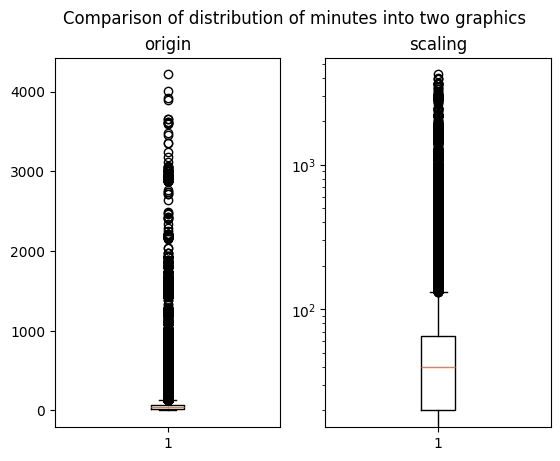

In [23]:
# Your code
fig = plt.figure()
fig.suptitle("Comparison of distribution of minutes into two graphics")
ax1 = fig.add_subplot(1,2,1) # nrows, ncol, the range of graphic
ax1.boxplot(df_without_missing_values["minutes"])
plt.title("origin")
ax2 = fig.add_subplot(1,2,2)
ax2.boxplot(df_without_missing_values["minutes"])
ax2.set_yscale('log', base = 10)
plt.title("scaling")

#### Summing-up: 
Minutes have the caracteristics bellow : 
- The major values are less than 1 minute, the dispersion is low (IQR is low) ;
- Right skewed distribution (median < average) ; 
- Contains outliers greater than the tendancy (values > Q3) ;

For now let's keep it this way. We will go back to this matter in the feature engineering session.

Now we can complete this analysis with distribution metrics, namely the skewness and the kurtosis coefficient. 

### Univariate Analysis follow-up 

You are now ready to propose your own analysis for the other variables. 
Consider the following variables: **contributor_id, tags, n_steps, n_ingredients and ingredients**. 
The first step is to formulate questions that you would like to answer to using these variables. 

For example, if we take the contributor_id, please answer the following questions using the varying tools seen during the class. 

**Questions**
- <span style="color:blue">How many unique contributors are there?</span> 
- <span style="color:blue">Who is the contributor that posted the most recipes ? And how many recipes did that person posted ? </span>
- <span style="color:blue">What is the average number of recipes posted by users on the website ? </span>

Start with these three questions, then think about questions for the remaining variables mentioned above. 

In [24]:
unique_contributor = len(df_without_missing_values["contributor_id"].unique())
print("There are", unique_contributor,"unique contributors.")

There are 27670 unique contributors.


In [25]:
contributor_number_repetition = df_without_missing_values["contributor_id"].value_counts()
print(contributor_number_repetition)

contributor_id
89831      3112
37449      2482
37779      2472
58104      1514
169430     1375
           ... 
318252        1
230455        1
327778        1
94472         1
1289564       1
Name: count, Length: 27670, dtype: int64


In [26]:
contributor_number_repetition.nlargest(1)

contributor_id
89831    3112
Name: count, dtype: int64

In [27]:
print("The contributor that post the most is : ", 89831,".")
print("He posts", 3118 , "recipes.")

The contributor that post the most is :  89831 .
He posts 3118 recipes.


In [28]:
contributor_average = np.mean(contributor_number_repetition)
print("The average number of recipes posted is : ", contributor_average)

The average number of recipes posted is :  8.17448500180701


## Analyse the variable "n_steps"

**Questions** 
- <span style="color : blue">Print the values of the different quartile (Q1, median and Q3). What can you conclude for this variable ?</span>- <span style="color : blue "> 
Compare the mean with the median. What do you observe </span>?

In [29]:
df_without_missing_values["n_steps"].describe()

count    226188.000000
mean          9.768905
std           5.993502
min           0.000000
25%           6.000000
50%           9.000000
75%          12.000000
max         145.000000
Name: n_steps, dtype: float64

Here are the most relevants characteristics if n_steps : 

- The major values are fewer than 12 steps.
- As we can see, they are centered around to 9 steps and the mean is close to the median.
- However, since the mean is slighgly greater que than median. We cannot rely on standard deviation.
- The dispersion is range generaly between 6 and 9 steps.
- The max is very high, we can say that the distribution is right skewed. And it contains outliers.  
- n_steps has the same distribution of minutes.
  
What is the appropriate graphics to show these result? Let's compare the histogramm and box_plot

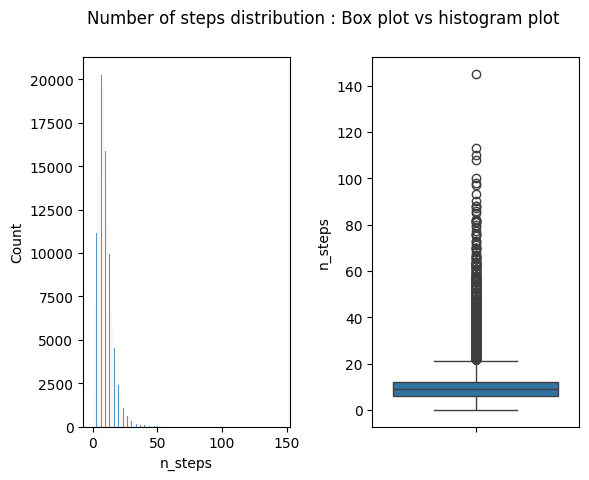

In [30]:
fig = plt.figure()
fig.suptitle("Number of steps distribution : Box plot vs histogram plot")
ax1 = fig.add_subplot(1,2,1)
sns.histplot(df_without_missing_values["n_steps"])
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(df_without_missing_values["n_steps"])
fig.subplots_adjust(wspace=0.4)

As we can see, box_plot is the best way to represent the number of steps. 

We have one singe valu that is greater than 140. Let's analyse this value.

**Questions :**
- <span style="color:blue"> What is the noun of the recipe related to 140 steps?  </span>
- <span style="color:blue"> Is this recipe related to the maximal minutes? If don't, is this logical?  </span>

In [31]:
n_steps_maximal = df_without_missing_values["n_steps"].max()
n_steps_maximal_row = df_without_missing_values[df_without_missing_values["n_steps"] == n_steps_maximal]
print(n_steps_maximal_row)

                                   name      id  minutes  contributor_id  \
78633  easy yeast bread with variations  158120      210          182358   

        submitted                                               tags  \
78633  2006-02-28  ['time-to-make', 'course', 'preparation', 'hea...   

                                             nutrition  n_steps  \
78633  [1784.5, 62.0, 104.0, 151.0, 103.0, 42.0, 99.0]      145   

                                                   steps  \
78633  ['white bread:', 'lightly spooning flour into ...   

                                             description  \
78633  found online in response to a request and now ...   

                                             ingredients  n_ingredients  
78633  ['all-purpose flour', 'dry yeast', 'sugar', 's...              8  


In [32]:
type(n_steps_maximal_row)

pandas.core.frame.DataFrame

- The name of the recipe is "easy yeast bread with variations". 
- It takes 210 minutes
- the number of ingredients is just 8.

As we can see, this recipe is supposed to be easy to cook, but it takes a long time despite having only a few ingredients. That doesn't make sense.
So, let's delete it.

In [33]:
n_steps_maximal_row_index = n_steps_maximal_row.index
print(n_steps_maximal_row_index)

Index([78633], dtype='int64')


In [34]:
df_without_missing_values = df_without_missing_values.drop(n_steps_maximal_row_index)

In [35]:
print("right now, the number of steps maximal is : ", df_without_missing_values["n_steps"].max())

right now, the number of steps maximal is :  113


# n_ingredients

**Questions :**
- Are there a list of ingredients which are used at least 02 times?
- Can you precise the top 10 which are the most used? 

In [111]:
ingredients = df_without_missing_values["ingredients"]
ingredients[:4]

0    ['winter squash', 'mexican seasoning', 'mixed ...
1    ['prepared pizza crust', 'sausage patty', 'egg...
2    ['ground beef', 'yellow onions', 'diced tomato...
3    ['spreadable cheese with garlic and herbs', 'n...
Name: ingredients, dtype: object

In [112]:
type(ingredients)

pandas.core.series.Series

In [113]:
print(f"There are : ", len(df_without_missing_values) - len(ingredients.unique()), "list of ingredients which used at least 02 times")

There are :  1096 list of ingredients which used at least 02 times


In [114]:
print("Here are the list of top 10 ingredients which are most used :", ingredients.value_counts().nlargest(10))

Here are the list of top 10 ingredients which are most used : ingredients
['eggs', 'water']                                                                                                                              9
['all-purpose flour', 'baking powder', 'salt', 'butter', 'milk']                                                                               5
['lemons', 'limes', 'oranges', 'water', 'sugar']                                                                                               5
['butter', 'sugar', 'flour']                                                                                                                   5
['butter', 'honey']                                                                                                                            5
['sugar', 'water']                                                                                                                             5
['flour', 'baking powder', 'salt', 'shortening', 'milk']

eggs and water are the ingredients most commonly used. 
As we can see, water is repeated on some list. It is also the case of milk, butter, salt, .... It leads us to respond the next question : 
- <span style="color : blue"> What are the main ingredients used ? Show the top 10 ingredients using pie chart ! </span>

In [115]:
# Let's try with two list
ingredient_two_first_rows = ingredients[:2]
ingredient_two_first_rows

0    ['winter squash', 'mexican seasoning', 'mixed ...
1    ['prepared pizza crust', 'sausage patty', 'egg...
Name: ingredients, dtype: object

In [116]:
# How to select the element on the list? 
print(ingredient_two_first_rows[0][1])

'


In [117]:
ingredient_two_first_rows = ingredient_two_first_rows.apply(ast.literal_eval)

In [118]:
ingredient_two_first_rows_sublist = []
for list in ingredient_two_first_rows :
    for sublist in list : 
        ingredient_two_first_rows_sublist.append(sublist)
print(ingredient_two_first_rows_sublist)

['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt', 'prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']


In [119]:
Counter(ingredient_two_first_rows_sublist)

Counter({'winter squash': 1,
         'mexican seasoning': 1,
         'mixed spice': 1,
         'honey': 1,
         'butter': 1,
         'olive oil': 1,
         'salt': 1,
         'prepared pizza crust': 1,
         'sausage patty': 1,
         'eggs': 1,
         'milk': 1,
         'salt and pepper': 1,
         'cheese': 1})

In [120]:
ingredients

0         ['winter squash', 'mexican seasoning', 'mixed ...
1         ['prepared pizza crust', 'sausage patty', 'egg...
2         ['ground beef', 'yellow onions', 'diced tomato...
3         ['spreadable cheese with garlic and herbs', 'n...
4         ['tomato juice', 'apple cider vinegar', 'sugar...
                                ...                        
231632    ['celery', 'onion', 'green sweet pepper', 'gar...
231633    ['paprika', 'salt', 'garlic powder', 'onion po...
231634    ['hard-cooked eggs', 'mayonnaise', 'dijon must...
231635    ['butter', 'eagle brand condensed milk', 'ligh...
231636    ['granulated sugar', 'shortening', 'eggs', 'fl...
Name: ingredients, Length: 226187, dtype: object

In [121]:
# Here is the true code for all population
ingredients = ingredients.apply(ast.literal_eval)
ingredients

0         [winter squash, mexican seasoning, mixed spice...
1         [prepared pizza crust, sausage patty, eggs, mi...
2         [ground beef, yellow onions, diced tomatoes, t...
3         [spreadable cheese with garlic and herbs, new ...
4         [tomato juice, apple cider vinegar, sugar, sal...
                                ...                        
231632    [celery, onion, green sweet pepper, garlic clo...
231633    [paprika, salt, garlic powder, onion powder, d...
231634    [hard-cooked eggs, mayonnaise, dijon mustard, ...
231635    [butter, eagle brand condensed milk, light bro...
231636    [granulated sugar, shortening, eggs, flour, cr...
Name: ingredients, Length: 226187, dtype: object

In [122]:
ingredients_sublist = []
for list in ingredients : 
    for sublist in list :
        ingredients_sublist.append(sublist)

In [143]:
ingredients_sublist_count = Counter(ingredients_sublist)
print("Here are the top 10 of the most used ingredients") 
ingredients_sublist_count.most_common(10)

Here are the top 10 of the most used ingredients


[('salt', 83670),
 ('butter', 53759),
 ('sugar', 43266),
 ('onion', 38126),
 ('water', 33925),
 ('eggs', 33024),
 ('olive oil', 32208),
 ('flour', 25643),
 ('garlic cloves', 25587),
 ('milk', 25212)]

Let's transform it into dataframe to have an ergonomic visualisation

In [184]:
ingredients_sublist_top_10 = ingredients_sublist_count.most_common(10)
print(ingredients_sublist_top_10[0])
ingredients_sublist_top_10 = dict(ingredients_sublist_top_10)
print(ingredients_sublist_top_10)

('salt', 83670)
{'salt': 83670, 'butter': 53759, 'sugar': 43266, 'onion': 38126, 'water': 33925, 'eggs': 33024, 'olive oil': 32208, 'flour': 25643, 'garlic cloves': 25587, 'milk': 25212}


In [185]:
ingredients_sublist_top_10 = pd.DataFrame.from_dict(ingredients_sublist_top_10, orient="index", columns = ["count"])
ingredients_sublist_top_10 = ingredients_sublist_top_10.reset_index().rename(columns={'index': 'ingredient'})
ingredients_sublist_top_10

,ingredient,count
0,salt,83670
1,butter,53759
2,sugar,43266
3,onion,38126
4,water,33925
5,eggs,33024
6,olive oil,32208
7,flour,25643
8,garlic cloves,25587
9,milk,25212


In [193]:
ingredients_sublist_top_10.dtypes

ingredient    object
count          int64
dtype: object

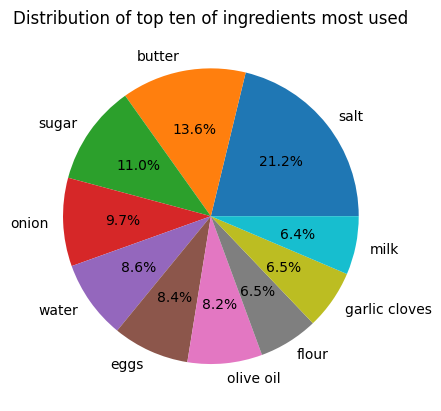

In [200]:
size = ingredients_sublist_top_10["count"]
labels = ingredients_sublist_top_10["ingredient"]
fig = plt.figure()
ax = fig.add_subplot()
plt.title("Distribution of top ten of ingredients most used")
ax.pie(size, labels = labels, autopct='%1.1f%%')
plt.show()

# Tags

In [202]:
df["tags"].head()

0    ['60-minutes-or-less', 'time-to-make', 'course...
1    ['30-minutes-or-less', 'time-to-make', 'course...
2    ['time-to-make', 'course', 'preparation', 'mai...
3    ['60-minutes-or-less', 'time-to-make', 'course...
4    ['weeknight', 'time-to-make', 'course', 'main-...
Name: tags, dtype: object

In [209]:
df["tags"][5000]

"['60-minutes-or-less', 'time-to-make', 'course', 'cuisine', 'preparation', 'north-american', 'hand-formed-cookies', 'desserts', 'american', 'cookies-and-brownies', 'amish-mennonite', 'northeastern-united-states']"

**Question**
- My grandmother wants to eat american food but she is diabetic. What kind of aliment can I Propose to her?

In [210]:
tags = df["tags"] 

In [213]:
# Conversion of sublist to manipulate it
tags = tags.apply(ast.literal_eval)

In [214]:
# We can create now a list contains sublist
tags_sublist = []
for list in tags: 
    for sublist in list:
        tags_sublist.append(sublist)

In [221]:
# Verify diabetic and american 
for sublist in tags_sublist : 
    if sublist.startswith("diabeti"):
        print("Ok")

Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
O

In [229]:
print("we have", tags_sublist.count("diabetic"), "recipe for diabetic.")

we have 6284 recipe for diabetic


In [232]:
print("We have", tags_sublist.count("american"), " american food.")

We have 30184  american food


In [249]:
american_recipe_for_diabetic = []
for tags_list in tags : 
    if "diabetic" in tags_list and "american" in tags_list :
        if sublist not in ["rice", "sugar"] : 
            american_recipe_for_diabetic.append(tags_list)

In [250]:
american_recipe_for_diabetic[:5]

[['15-minutes-or-less',
  'time-to-make',
  'course',
  'main-ingredient',
  'cuisine',
  'preparation',
  'occasion',
  'north-american',
  'side-dishes',
  'vegetables',
  'american',
  'easy',
  'diabetic',
  'dinner-party',
  'heirloom-historical',
  'holiday-event',
  'kid-friendly',
  'vegetarian',
  'stove-top',
  'dietary',
  'christmas',
  'thanksgiving',
  'comfort-food',
  'amish-mennonite',
  'northeastern-united-states',
  'corn',
  'taste-mood',
  'equipment',
  'number-of-servings'],
 ['15-minutes-or-less',
  'time-to-make',
  'course',
  'cuisine',
  'preparation',
  'occasion',
  'north-american',
  'for-1-or-2',
  'low-protein',
  'condiments-etc',
  'american',
  'barbecue',
  'easy',
  'diabetic',
  'holiday-event',
  'kid-friendly',
  'summer',
  'marinades-and-rubs',
  'dietary',
  'seasonal',
  'low-carb',
  'independence-day',
  'low-in-something',
  'equipment',
  'grilling',
  'number-of-servings'],
 ['weeknight',
  '15-minutes-or-less',
  'time-to-make',
  'c